In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
%matplotlib inline 

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x_data = np.linspace(0.0,10.0,1000000)

noise = np.random.randn(len(x_data))

In [4]:
noise

array([-1.07446318, -0.11154599, -2.59521894, ...,  0.28867401,
        0.55463042,  1.52657043])

In [5]:
y_true = (0.5*x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data = x_data, columns=["X Data"])
y_df = pd.DataFrame(data = y_true, columns=["Y"])

In [7]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [8]:
y_df.head()

,Y
0,3.925537
1,4.888459
2,2.404791
3,4.593872
4,6.416670


In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,X Data,Y
0,0.00000,3.925537
1,0.00001,4.888459
2,0.00002,2.404791
3,0.00003,4.593872
4,0.00004,6.416670


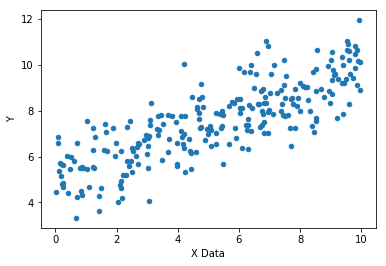

In [11]:
my_data.sample(n = 250).plot(kind="scatter", x= "X Data", y= "Y")

In [12]:
batch_size = 8

In [13]:
np.random.rand(2)


array([0.81160122, 0.79272739])

In [14]:
m = tf.Variable(0.34)
b = tf.Variable(0.48)

In [15]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])


In [16]:
y_model = m*xph + b

In [17]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [19]:
train = optimizer.minimize(error)

In [20]:
init  = tf.global_variables_initializer()

In [26]:
with tf.Session() as sess:
    sess.run(init)
    batches = 100000
    for i in range(batches):
        
        rand_init = np.random.randint(len(x_data), size = batch_size)
        feed = {xph:x_data[rand_init],yph:y_true[rand_init]}
        
        sess.run(train,feed_dict = feed)
    model_m,model_b = sess.run([m,b])

In [27]:
model_m

0.5445152

In [28]:
model_b

4.94075

In [29]:
y_hat = x_data*model_m + model_b

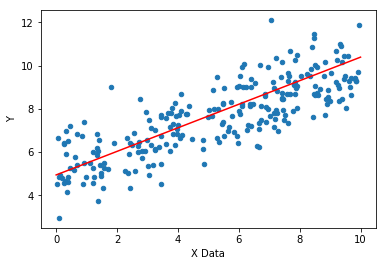

In [30]:
my_data.sample(250).plot(kind = "scatter", x = "X Data" , y = "Y")
plt.plot(x_data, y_hat,"r")